In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras
from keras_preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import re

In [235]:
pd.set_option('display.max_rows', 15)

In [236]:
data = pd.read_csv('../data/news_articles.csv')

In [237]:
data.columns

Index(['author', 'published', 'title', 'text', 'language', 'site_url',
       'main_img_url', 'type', 'label', 'title_without_stopwords',
       'text_without_stopwords', 'hasImage'],
      dtype='object')

In [238]:
data.head(5)

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2096 non-null   object 
 2   title                    2096 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2094 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2095 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.6+ KB


In [240]:
data.describe(include='object').T

,count,unique,top,freq
author,2096,491,No Author,505
published,2096,2006,2016-10-30T13:00:00.000+02:00,8
title,2096,1784,no title,186
text,2050,1941,notify me of followup comments by email notify...,6
language,2095,5,english,2017
site_url,2095,68,wnd.com,100
main_img_url,2095,1229,No Image URL,466
type,2095,8,bs,601
label,2095,2,Fake,1294
title_without_stopwords,2094,1780,title,187


In [241]:
data.isnull().sum()

author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64

In [242]:
# Drop a row with missing values on most of the columns
data[data['language'].isnull()]
data = data[data['language'].notnull()]
data.isnull().sum()

author                      0
published                   0
title                       0
text                       45
language                    0
site_url                    0
main_img_url                0
type                        0
label                       0
title_without_stopwords     1
text_without_stopwords     49
hasImage                    0
dtype: int64

In [243]:
# Can retain a few rows if just dropping null in text
# and create the text_without_stopwords from the text ourselves
data = data[data['text_without_stopwords'].notnull()]
data.isnull().sum()

author                     0
published                  0
title                      0
text                       0
language                   0
site_url                   0
main_img_url               0
type                       0
label                      0
title_without_stopwords    1
text_without_stopwords     0
hasImage                   0
dtype: int64

In [244]:
# impute the missing title_without_stopwords with title for a row
data[data['title_without_stopwords'].isnull()]
data.loc[data['title_without_stopwords'].isnull(), 'title_without_stopwords'] = data.loc[data['title_without_stopwords'].isnull(), 'title']

In [245]:
print(data.iloc[374])
data.isnull().sum()

author                                                       Daniel Haiphong
published                                      2016-11-17T02:00:00.000+02:00
title                                                           won now what
text                       the syrian army and hezbollah resistance force...
language                                                             english
site_url                                                       ahtribune.com
main_img_url               http://ahtribune.com/images/media/Donald_Trump...
type                                                                      bs
label                                                                   Fake
title_without_stopwords                                         won now what
text_without_stopwords     syrian army hezbollah resistance forces contin...
hasImage                                                                 1.0
Name: 374, dtype: object


author                     0
published                  0
title                      0
text                       0
language                   0
site_url                   0
main_img_url               0
type                       0
label                      0
title_without_stopwords    0
text_without_stopwords     0
hasImage                   0
dtype: int64

In [246]:
# Inspect other languages
print(data['language'].value_counts())
data_other_language = data[data['language'] != 'english']
data_other_language

language
english    1968
german       72
ignore        3
french        2
spanish       1
Name: count, dtype: int64


,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
848,davidduke.com,http://davidduke.com/wp-content/uploads/2014/0...,hate,httpmediaarchivesgsradionetddukemp dr duke fa...,ignore,davidduke.com,http://davidduke.com/wp-content/uploads/2016/1...,hate,Real,billion dollars jewish lobby tip iceberg,views share remarkable articleand admissionapp...,1.0
850,Staff,2016-11-20T14:58:00.000+02:00,billion dollars for the jewish lobby just the ...,views share in a remarkable articleand admiss...,ignore,davidduke.com,http://davidduke.com/wp-content/uploads/2016/1...,hate,Real,dont want break families encourage unaccompani...,share national bugle radio first step towards ...,1.0
855,Dr. Patrick Slattery,2016-11-22T10:47:49.603+02:00,national bugle radio the first step towards ov...,share \ntulsi gabbard for secretary of state a...,ignore,davidduke.com,http://davidduke.com/wp-content/uploads/2016/1...,hate,Real,dr duke pastor dankof trumps america first for...,september new homes sales rise back level davi...,1.0
936,No Author,2016-11-23T12:44:09.173+02:00,sparks fly as bikers for trump meet protesters,umfrage ceta würde enorm an zustimmung gewinne...,german,der-postillon.com,https://1.bp.blogspot.com/-fX3NNr8NmaE/Uci9s8r...,bs,Fake,weil sie sich prügelten gefängnisdirektor erte...,morgen neu kiosk postillon sonntag außerdem di...,1.0
937,noreply@blogger.com (Der Postillon),2016-10-27T10:54:56.270+03:00,studie beweist indianer kennen doch schmerz,steht ganz neben sich klonforscher nach erfolg...,german,der-postillon.com,https://3.bp.blogspot.com/-AgNqsD25l6M/WBHXDg6...,bs,Fake,umfrage ceta würde enorm zustimmung gewinnen w...,samstag oktober autofahrer entlarvt geheimen z...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1006,noreply@blogger.com (Der Postillon),2016-11-21T18:16:38.932+02:00,sicher trainieren beim spinning gilt ab sofort...,posted on october by admin \nby vekar \none ...,german,der-postillon.com,https://4.bp.blogspot.com/-KPp1fzVKeEc/U_XOjN6...,bs,Fake,facebook geht gegen fakenews vor alle meldunge...,notify followup comments email notify new post...,1.0
1007,noreply@blogger.com (Der Postillon),2016-11-22T11:15:13.537+02:00,studie lohnzahlungen verursachen milliardensch...,published on may by cbs sunday morning there...,german,der-postillon.com,https://3.bp.blogspot.com/-lwOiXNE4v5g/WDQ0IQ_...,bs,Fake,bait switch elections,notify followup comments email notify new post...,1.0
1499,No Author,2016-11-01T09:31:48.155+02:00,presstvhezbollah shares aouns victory lebanon fm,the energy minister of iran hamid chitchian \n...,french,presstv.com,http://media.presstv.com/photo/20161026/956c0e...,state,Real,presstvus troops could prosecuted war crimes,news bulletin rita jeptoo celebrates trophy wi...,1.0
1878,"Gordon Duff, Senior Editor",2016-10-28T21:41:33.777+03:00,is alex jones covering for trumps jewish mob t...,lying arrogant muslim marxist piece of dogsht,french,voltairenet.org,http://www.voltairenet.org/local/cache-vignett...,bs,Fake,social media censoring fbis reopened clinton e...,lies esteemed scandalous liberal muslim leader...,0.0


In [247]:
# clean data
data['language'] = data['language'].replace('spanish', 'english')
data['language'] = data['language'].replace('french', 'english')
data['language'] = data['language'].replace('ignore', 'english')
data = data[data['language'] != 'german']

data['language'].value_counts()

language
english    1974
Name: count, dtype: int64

In [248]:
data['label'].value_counts()

label
Fake    1220
Real     754
Name: count, dtype: int64

In [249]:
# def clean_text(text):
#     if isinstance(text, str):
#         # remove URLs
#         text = re.sub(r'http\S+|www\S+', '', text)
#     return text

# data['title_without_stopwords'] = data['title_without_stopwords'].apply(clean_text)
# data['text_without_stopwords'] = daat['text_without_stopwords'].apply(clean_text)

In [250]:
print(data['label'].value_counts())
data['label'] = data['label'].replace({'Fake': 1, 'Real': 0})
data['label'].astype(int)

label
Fake    1220
Real     754
Name: count, dtype: int64


/var/folders/cv/swyglqyx1tlc_6vc0p615fhr0000gn/T/ipykernel_27116/2819706040.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['label'] = data['label'].replace({'Fake': 1, 'Real': 0})


0       0
1       0
2       0
3       0
4       0
       ..
2041    0
2042    0
2043    0
2044    0
2045    0
Name: label, Length: 1974, dtype: int64

author
No Author               504
Activist Post            82
EdJenner                 73
Anonymous                58
Daniel Greenfield        55
admin                    48
Jason Easley             45
Alex Ansary              44
Dr. Patrick Slattery     38
Henry Wolff              33
Name: count, dtype: int64
site_url
politicususa.com         100
clickhole.com            100
westernjournalism.com    100
activistpost.com         100
returnofkings.com        100
                        ... 
wnd.com                   51
legorafi.fr               46
davidduke.com             45
amtvmedia.com             44
amren.com                 40
Name: count, Length: 20, dtype: int64


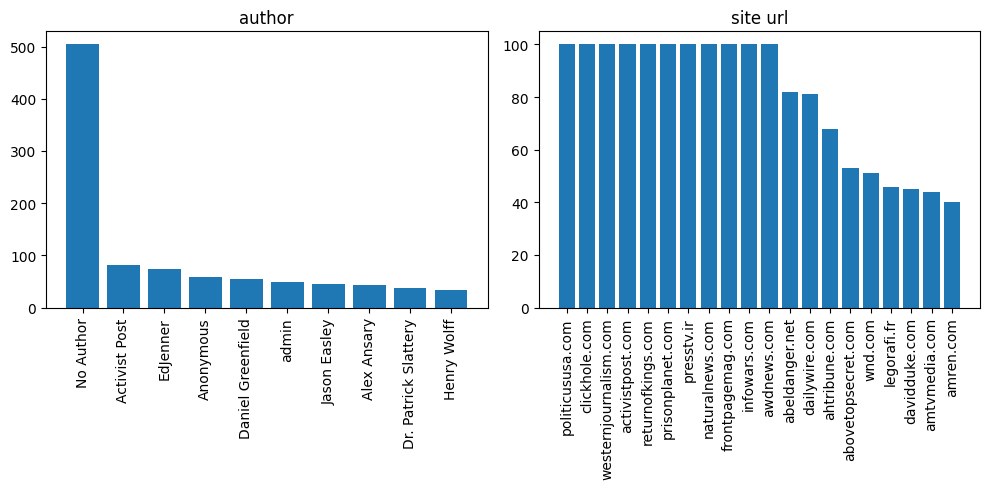

In [251]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

author_count = data['author'].value_counts()[:10]
print(author_count)
ax[0].bar(author_count.index, author_count.values)
ax[0].set_xticks(range(len(author_count)))
ax[0].set_xticklabels(author_count.index, rotation=90)
ax[0].set_title('author')

url_count = data['site_url'].value_counts()[:20]
print(url_count)
ax[1].bar(url_count.index, url_count.values)
ax[1].set_xticks(range(len(url_count)))
ax[1].set_xticklabels(url_count.index, rotation=90)
ax[1].set_title('site url')

plt.tight_layout()

plt.savefig('../figures/author_and_url.jpeg')

type
bs            527
conspiracy    430
bias          389
hate          244
satire        146
state         121
junksci       102
fake           15
Name: count, dtype: int64
label
1    1220
0     754
Name: count, dtype: int64


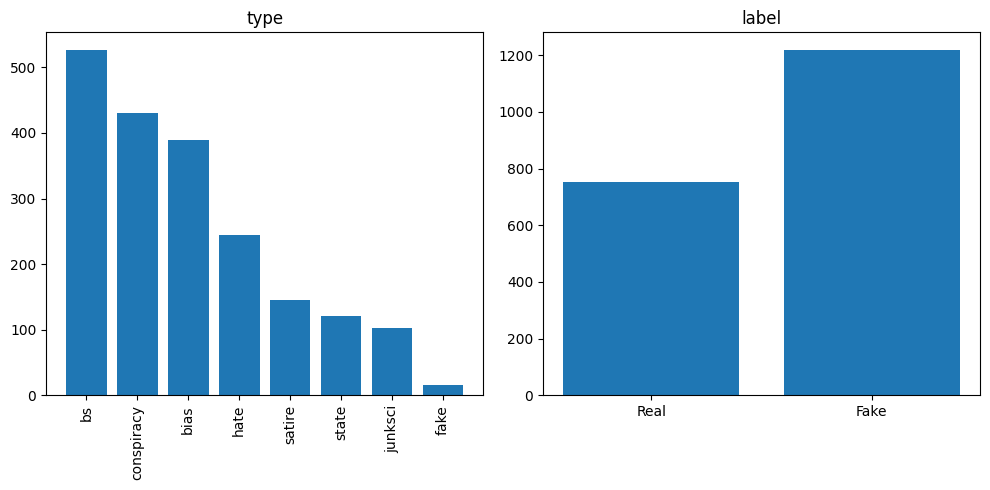

In [252]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

type_count = data['type'].value_counts()
print(type_count)
ax[0].bar(type_count.index, type_count.values)
ax[0].set_xticks(range(len(type_count)))
ax[0].set_xticklabels(type_count.index, rotation=90)
ax[0].set_title('type')

label_count = data['label'].value_counts()[:20]
print(label_count)
ax[1].bar(label_count.index, label_count.values)
ax[1].set_xticks(range(len(label_count)))
ax[1].set_xticklabels(['Real', 'Fake'])
ax[1].set_title('label')

plt.tight_layout()

plt.savefig('../figures/type_and_label.jpeg')